# Import Required Libraries
Import necessary libraries such as pandas, numpy, matplotlib, seaborn, and statsmodels.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR

# Set seaborn style for plots
sns.set(style="whitegrid")

# Load the Dataset
Load the day_of_events.csv file into a pandas DataFrame.

In [10]:
# Load the Dataset
df = pd.read_csv('c_37/open_2012_08_22_close_2012_08_22_flight_Fixed Wing_N545ND_day_of_99769.csv')
# skip the first 2 rows
df = pd.read_csv('c_37/open_2012_08_22_close_2012_08_22_flight_Fixed Wing_N545ND_day_of_99769.csv', skiprows=2)
# Display the first few rows of the DataFrame
df.head()

,Lcl Date,Lcl Time,UTCOfst,AtvWpt,Latitude,Longitude,AltB,BaroA,AltMSL,OAT,...,PitchM,RollC,PichC,VSpdG,GPSfix,HAL,VAL,HPLwas,HPLfd,VPLwas
0,2012-08-22,16:50:40,-05:00,,,,945.6,29.91,,32.2,...,,,,,NoSoln,3704.0,,,,
1,2012-08-22,16:50:40,-05:00,,,,945.6,29.91,,32.2,...,,,,,NoSoln,3704.0,,,,
2,2012-08-22,16:50:42,-05:00,,,,945.6,29.91,,32.2,...,,,,,NoSoln,3704.0,,,,
3,2012-08-22,16:50:43,-05:00,,,,945.6,29.91,,32.2,...,,,,,NoSoln,3704.0,,,,
4,2012-08-22,16:50:44,-05:00,,,,945.6,29.91,,32.2,...,,,,,NoSoln,3704.0,,,,


# Explore the Dataset
Perform initial exploration of the dataset, including checking for missing values and basic statistics.

Missing values in each column:
   Lcl Date       0
 Lcl Time        0
 UTCOfst         0
 AtvWpt          0
     Latitude    0
                ..
  HAL            1
   VAL           1
 HPLwas          1
 HPLfd           1
 VPLwas          1
Length: 64, dtype: int64

Basic statistics of the dataset:
           Lcl Date   Lcl Time   UTCOfst   AtvWpt       Latitude  \
count          123        123       123      123            123   
unique           1        117         1        1             21   
top     2012-08-22   16:50:40    -05:00                           
freq           123          3       123      123             91   
mean           NaN        NaN       NaN      NaN            NaN   
std            NaN        NaN       NaN      NaN            NaN   
min            NaN        NaN       NaN      NaN            NaN   
25%            NaN        NaN       NaN      NaN            NaN   
50%            NaN        NaN       NaN      NaN            NaN   
75%            NaN        NaN

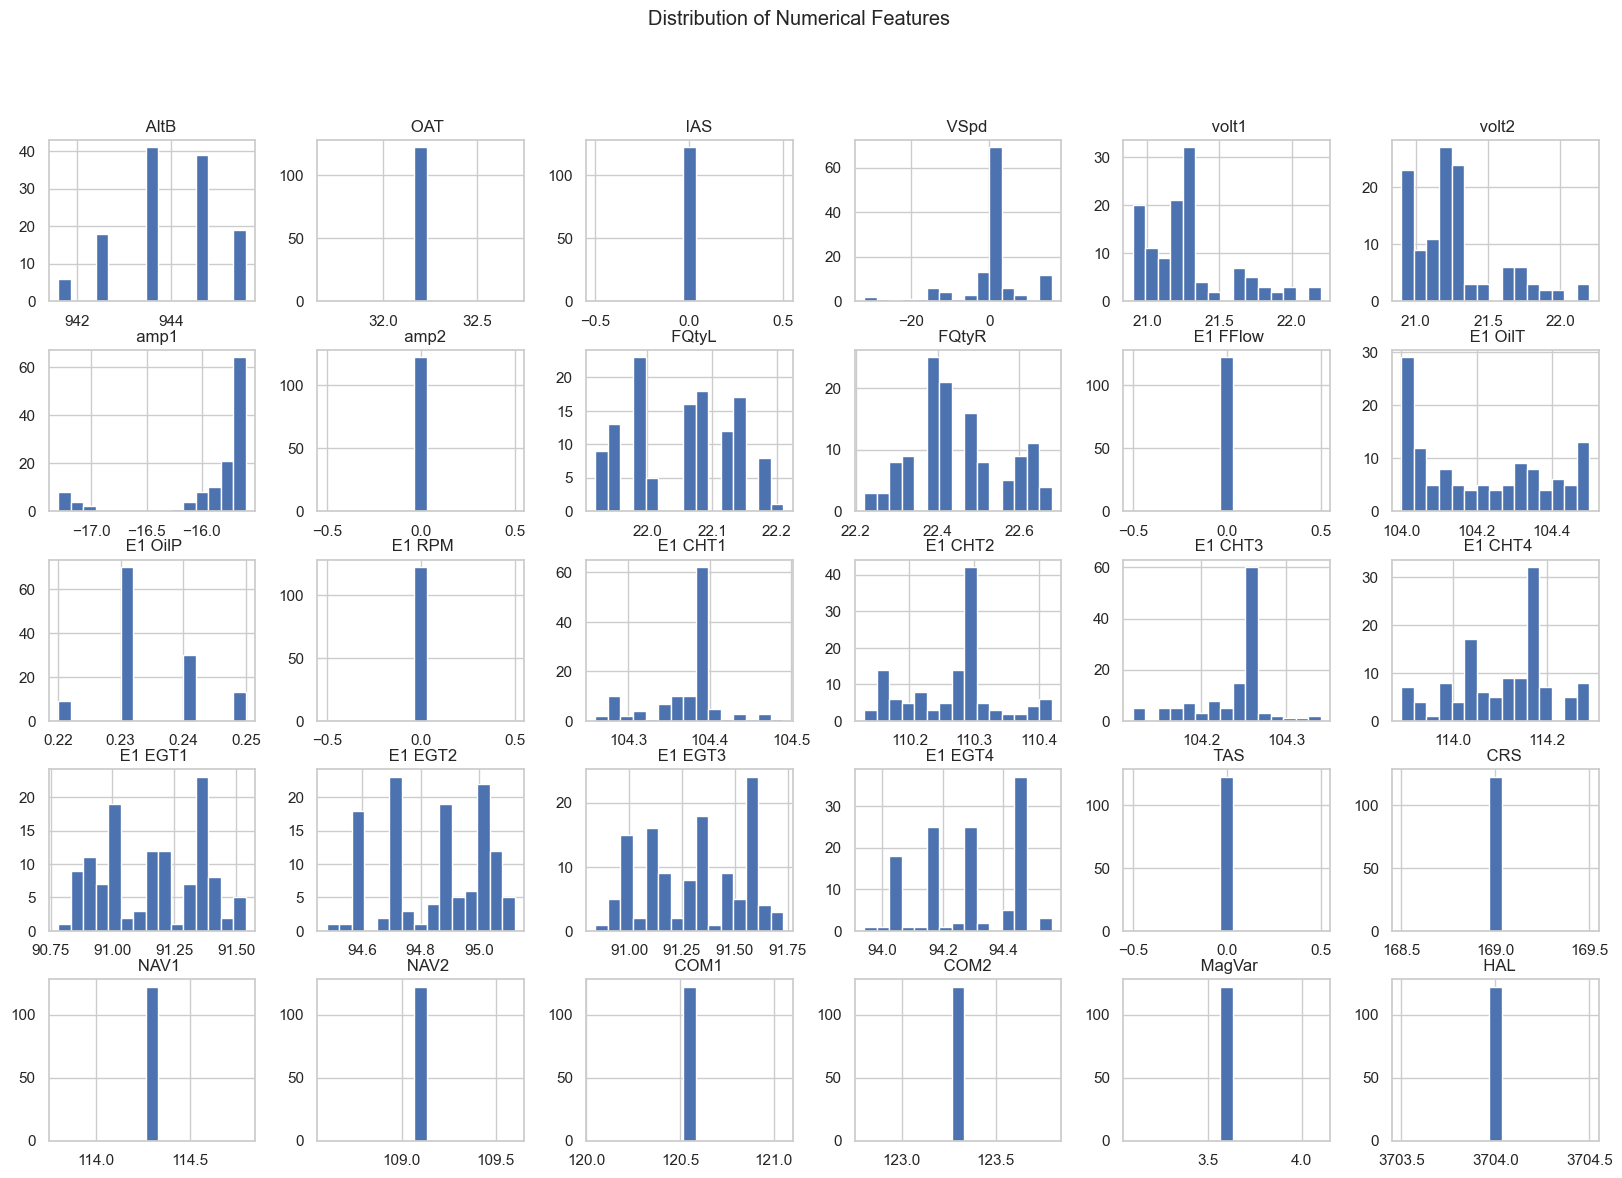

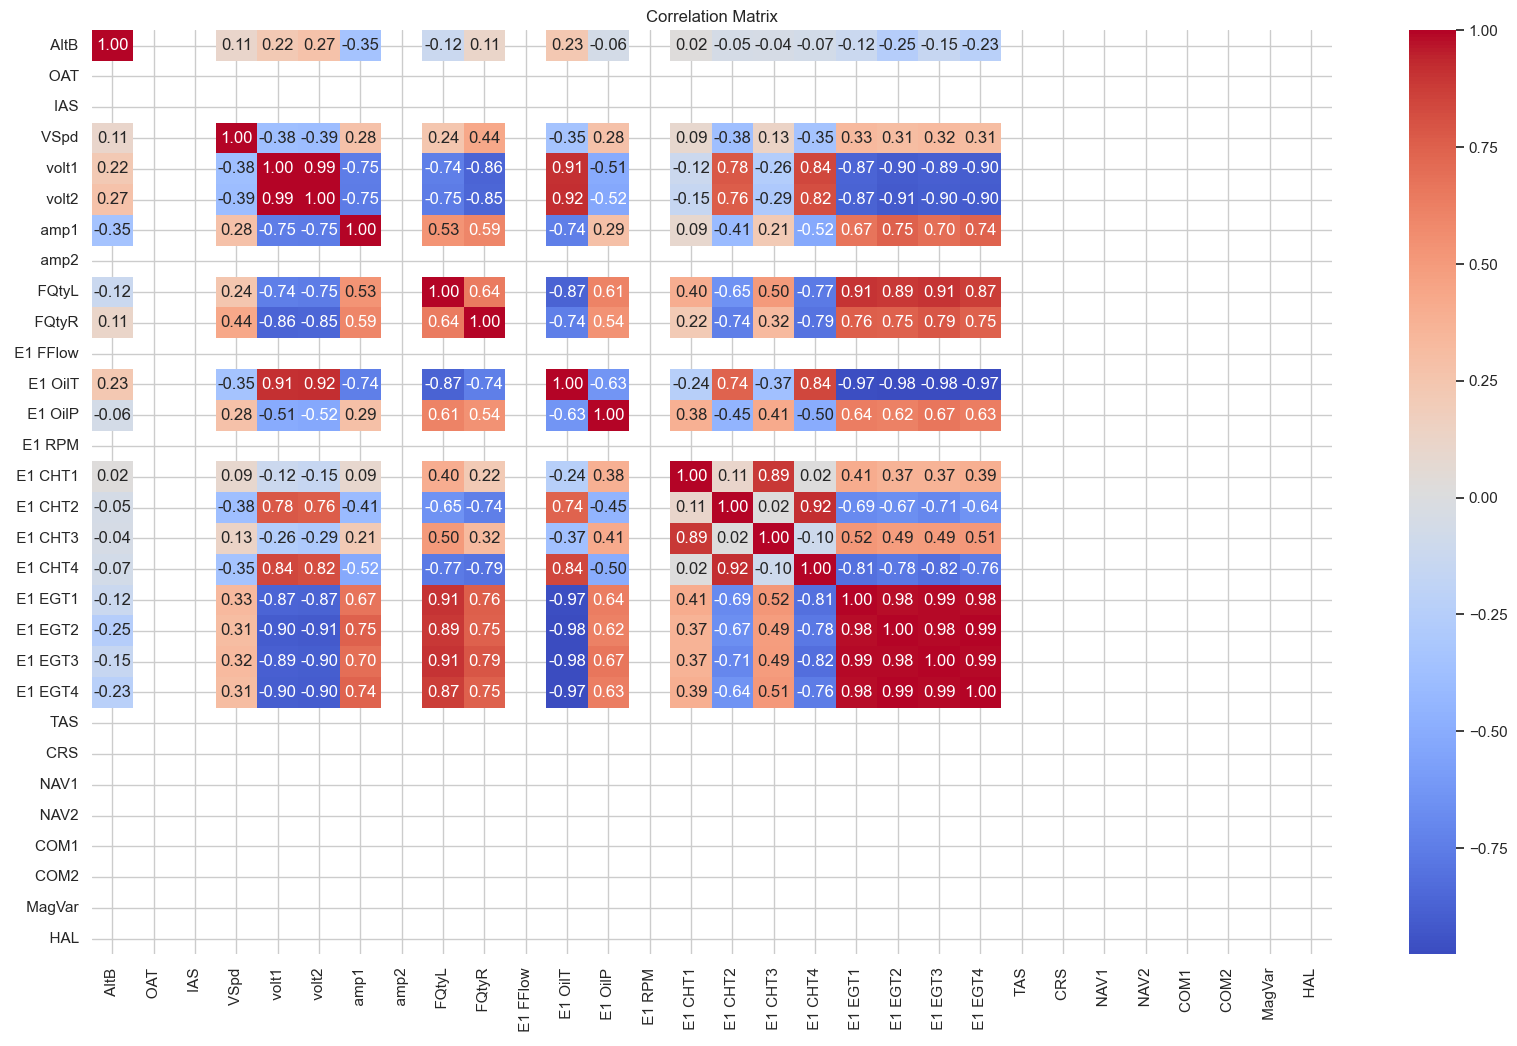

In [16]:
# Explore the Dataset

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display basic statistics of the dataset
basic_stats = df.describe(include='all')
print("\nBasic statistics of the dataset:\n", basic_stats)

# Display the data types of each column
data_types = df.dtypes
print("\nData types of each column:\n", data_types)

# Plot the distribution of each numerical feature if there are any
numerical_features = df.select_dtypes(include=[np.number]).columns
if not numerical_features.empty:
	df[numerical_features].hist(bins=15, figsize=(20, 13), layout=(5, 6))
	plt.suptitle('Distribution of Numerical Features')
	plt.show()
else:
	print("No numerical features to plot.")

# Plot the correlation matrix if there are any numerical features
if not numerical_features.empty:
	correlation_matrix = df[numerical_features].corr()
	plt.figure(figsize=(20, 12))
	sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
	plt.title('Correlation Matrix')
	plt.show()
else:
	print("No numerical features to compute correlation matrix.")

# Preprocess the Data
Handle missing values, convert data types, and perform any necessary preprocessing steps.

In [8]:
# Preprocess the Data

# Handle missing values by filling them with the mean of the column
df.fillna(df.mean(), inplace=True)

# Convert data types if necessary (example: converting 'timestamp' column to datetime)
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the 'timestamp' column as the index if it exists
if 'timestamp' in df.columns:
    df.set_index('timestamp', inplace=True)

# Display the first few rows of the preprocessed DataFrame
df.head()

# Verify that there are no missing values left
missing_values_after = df.isnull().sum()
print("Missing values in each column after preprocessing:\n", missing_values_after)

# Display the data types of each column after preprocessing
data_types_after = df.dtypes
print("\nData types of each column after preprocessing:\n", data_types_after)

Missing values in each column after preprocessing:
 #airframe_info                                 1
 log_version="1.00"                            1
 airframe_name="Cessna 172S"                   1
 unit_software_part_number="006-B0319-A3"      1
 unit_software_version="12.03"                 1
 system_software_part_number="006-B0563-26"    1
 system_id="2F8EB36E1"                         1
 mode=NORMAL                                   1
                                               1
dtype: int64

Data types of each column after preprocessing:
 #airframe_info                                 object
 log_version="1.00"                            object
 airframe_name="Cessna 172S"                   object
 unit_software_part_number="006-B0319-A3"      object
 unit_software_version="12.03"                 object
 system_software_part_number="006-B0563-26"    object
 system_id="2F8EB36E1"                         object
 mode=NORMAL                                   object
             

/var/folders/k_/mxrh7nj55tl1jtzf2n_d0swm0000gn/T/ipykernel_97290/1457843050.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


# Visualize the Time Series Data
Create visualizations of the time series data using matplotlib and seaborn to understand trends and patterns.

/var/folders/k_/mxrh7nj55tl1jtzf2n_d0swm0000gn/T/ipykernel_97290/4059959825.py:11: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


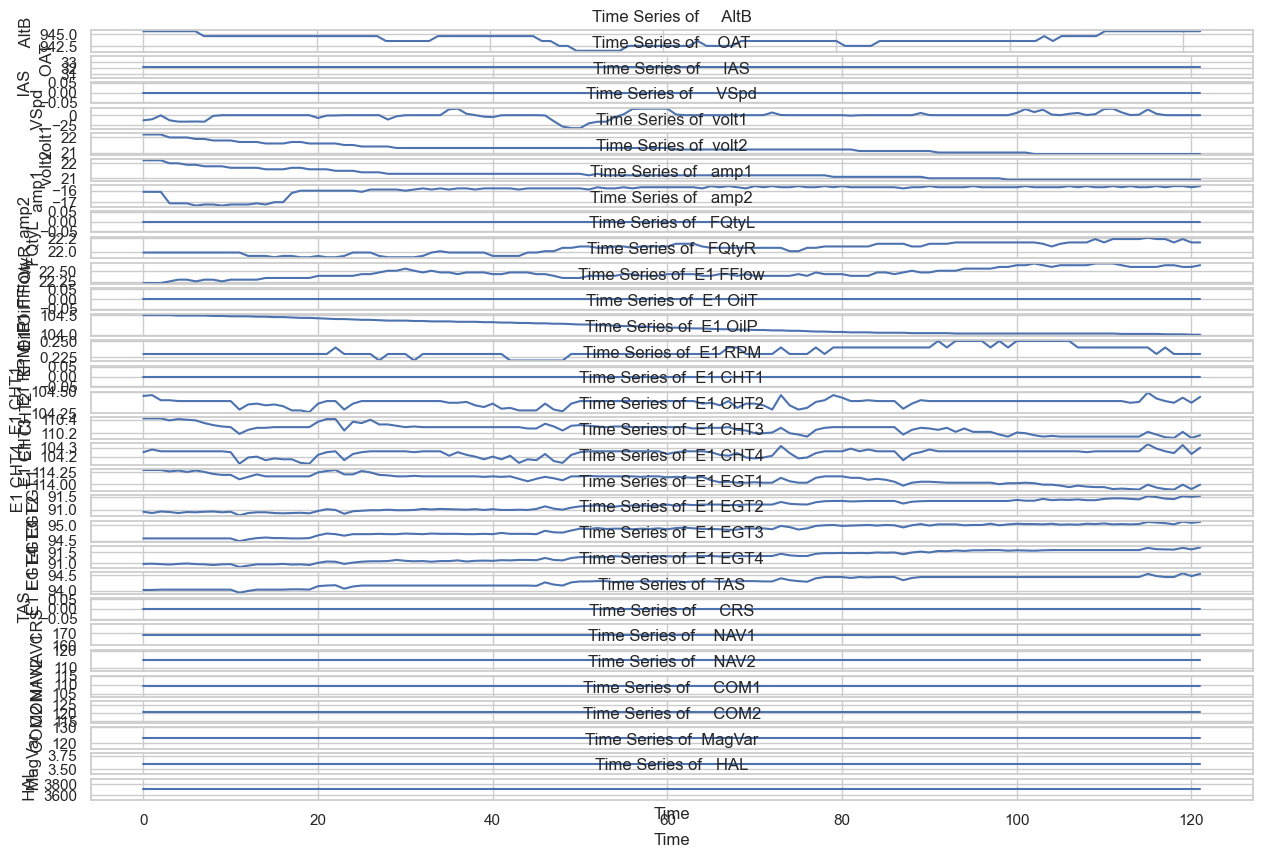

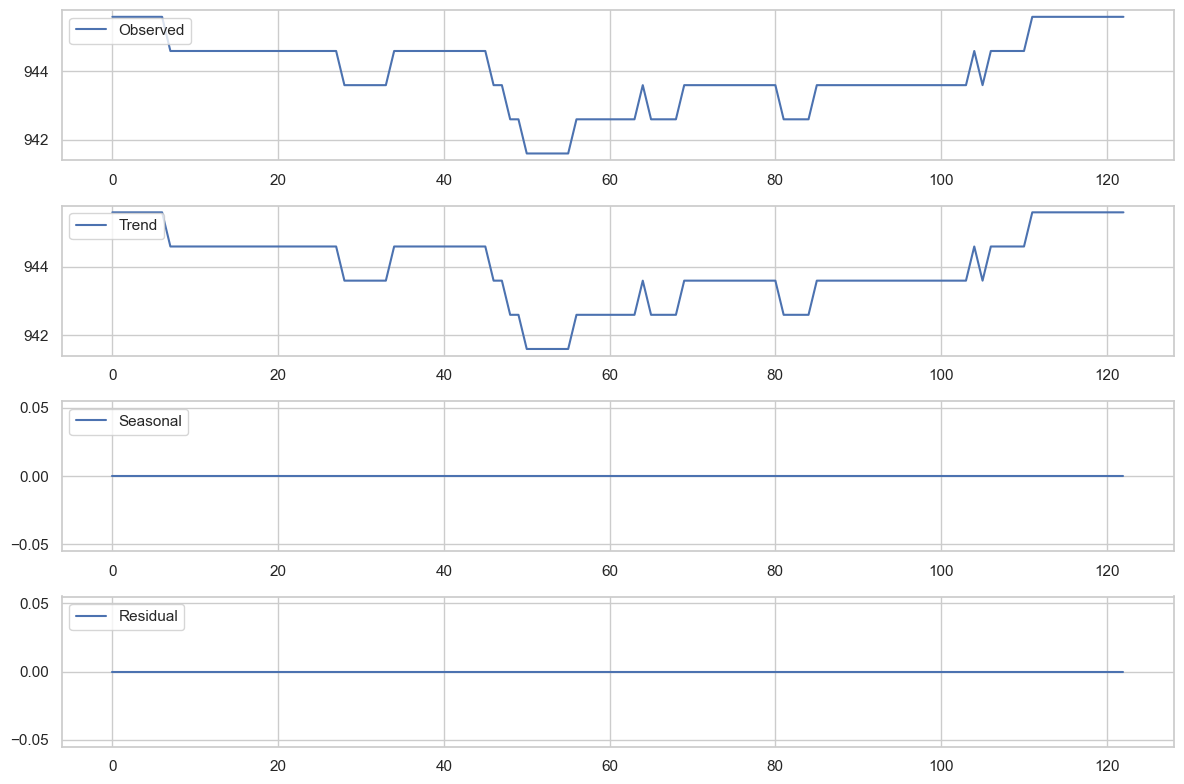

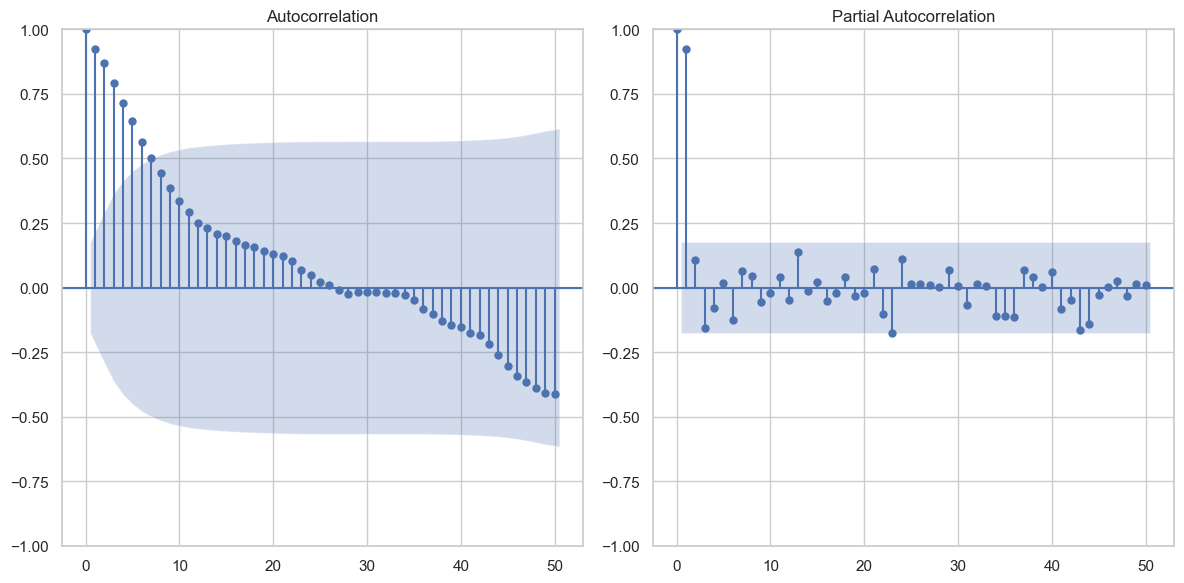

In [17]:
# Visualize the Time Series Data

# Plot the time series data for each numerical feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i + 1)
    plt.plot(df.index, df[column])
    plt.title(f'Time Series of {column}')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.tight_layout()
plt.show()

# Decompose the time series data for a selected feature (example: 'feature1')
selected_feature = numerical_features[0]  # Replace with the actual feature name if necessary
decomposition = seasonal_decompose(df[selected_feature], model='additive', period=1)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot the autocorrelation and partial autocorrelation for the selected feature
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df[selected_feature], ax=plt.gca(), lags=50)
plt.title('Autocorrelation')
plt.subplot(122)
plot_pacf(df[selected_feature], ax=plt.gca(), lags=50)
plt.title('Partial Autocorrelation')
plt.tight_layout()
plt.show()

# Multivariate Time Series Analysis
Perform multivariate time series analysis using statsmodels or other relevant libraries.

In [9]:
# Multivariate Time Series Analysis

# Check for stationarity of the time series data using the Augmented Dickey-Fuller test
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out.to_string())
    print('')

# Apply ADF test to each numerical feature
for column in numerical_features:
    adf_test(df[column], title=column)

# Select features for the VAR model (example: selecting the first three numerical features)
selected_features = numerical_features[:3]
df_selected = df[selected_features]

# Split the data into training and testing sets
train_size = int(len(df_selected) * 0.8)
train, test = df_selected[:train_size], df_selected[train_size:]

# Fit the VAR model
model = VAR(train)
model_fitted = model.fit(maxlags=15, ic='aic')

# Print the summary of the model
print(model_fitted.summary())

# Forecast the next steps
forecast_steps = len(test)
forecast = model_fitted.forecast(model_fitted.y, steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# Plot the actual vs forecasted values
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_features):
    plt.subplot(len(selected_features), 1, i + 1)
    plt.plot(train.index, train[column], label='Train')
    plt.plot(test.index, test[column], label='Test')
    plt.plot(forecast_df.index, forecast_df[column], label='Forecast')
    plt.title(f'Actual vs Forecasted {column}')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.tight_layout()
plt.show()

/Users/manasdubey2022/anaconda3/envs/ngafid_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ValueError: max() arg is an empty sequence